# Automated PDF Text Search and Analyzer (For a Single PDF File)
Prepared by Hiro Yokoi, July 10, 2019<br><br>
This is the temporary PDF analyzer to ease **text search** for **Portfolio Review and Analysis (PRA)** for managing urban spatial growth.

**Limitations of this Script**
- This PDF analyzer can only analyze ONE PDF file at a time at this moment. In the future, all the PDF files in a folder will be analyzed all at once.
- If the file is OCR-read PDF, this PDF analyzer does not accurately read the text (particularly multiple phrases).

**What you have to do**
- All you have to do is to change `your_folder_path` and `your_pdf_file_name`. Then, the system will automatically anlyze the texts in the PDF.
- If you want to change the search text, you can change the String part like `String = ['aaa', 'bbb', 'ccc', 'ddd']`. Be sure to type the **lower case** character. Text search is case sensitive.

### Import packages


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PyPDF2, textract, re, os
from matplotlib.ticker import MaxNLocator
%matplotlib inline
import glob
#from textblob import TextBlob
#from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords
#import nltk
#nltk.download('punkt')

<div class="alert alert-block alert-info">
<b>Note:</b>
    <br>When you install <b>textract</b> on your Windows computer, it will return an error. You need to execute following steps.<br>
- <b>1.</b> you need to install Microsoft Visual Studio C++ Compiler for Python. You need to download and install <b>Visual Studio Community</b> at https://visualstudio.microsoft.com/downloads/#build-tools-for-visual-studio-2017.<br>
- <b>2.</b> run following command line: <b>python -m pip install --upgrade pip setuptools wheel</b><br>
- <b>3.</b> run follwoing command line: <b>pip install six --upgrade</b><br>
- <b>4.</b> download EbookLib version 0.15 because textract has dependence on EbookLib version 0.15.After downloading the zip file at <b>https://github.com/aerkalov/ebooklib/releases</b>, unzipping it, and <b>manually revove the unicode character in the README.md file.</b><br>(unicode char is on <b>Line 44</b>. You can edit the file with text editter like notepad or Atom)<br>
- <b>5.</b> run following command line: <b>conda install swig</b><br>
- <b>6.</b> change the working directory to the unzipped Ebooklib folder: e.g. <b>cd C:\Users\username\Desktop\ebooklib-0.15</b><br>
- <b>7.</b> run the command to install EbookLib : <b>pip install .</b><br>
- <b>8.</b> run the textract installation : <b>pip install textract</b><br>
(Reference: https://stackoverflow.com/questions/50743723/cant-install-textract-on-windows)
</div>

### Your Manual Input
#### VERY IMPORTANT! Before runnning a command, manually create a blank folder on your desktop, change the name of the folder to "PDF", locate your PDF file in the folder.

First, type your UPI, then hit Enter.

In [3]:
#UPI = input('Please type your UPI number: ')

Second, type your PDF file name, then hit Enter.

In [4]:
#temp_file = input('Copy and paste your file name here: ')

Make sure your folder path and file name is correct.

In [5]:
#your_folder_path = r'C:\Users\wb' + str(UPI) + '\Desktop\PDF'
#your_pdf_file_name = str(temp_file)
#print('Your folder path is:', your_folder_path)
#print('Your file name is:', your_pdf_file_name)

In [6]:
# Backup for my personal use
your_folder_path = r'C:\Users\wb535782\Desktop'
your_pdf_file_name = r'class_material.pdf'

### Extract text from PDF file

In [7]:
# Establish complete file path
complete_path = os.path.join(your_folder_path, your_pdf_file_name)

# Open the pdf file
pdfFileObj = open(complete_path,'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

# Discern the number of pages, so that search all the pages.
num_pages = pdfReader.numPages

# Extract text in each page.
count = 0
text = ""
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()

# the condictional statement provides either the computer written document if its yes or the OCR scanned document if its no.
if text != "":
    text = text
else:
    text = textract.process(your_pdf_file_name, method='tesseract', language='eng')

# Clean text by removing new page, tab, double white space.
text = text.replace('\n','').replace('\t', '')
text = " ".join(text.split())
text_lower = text.lower()
#text_no_space = text_lower.replace(" ", "")

In [8]:
# Show first 200 words.
text[:200]

'This content downloaded from 213.49.110.68 on Mon, 28 Jan 2019 09:25:27 UTCAll use subject to https://about.jstor.org/termsDEMOGRAPHIC RESEARCHVOLUME 37, ARTICLE 42, PAGES 1351-1382PUBLISHED 2 NOVEMBE'

### Define search phrases

In [9]:
search_phrases = [
    'raise awareness',
    'regulatory reform',
    'institutional capacity',
    'policy reform',
    'informal settlement',
    'urban',
    'peri-urban',
    'municipal',
    'gender',
    'poverty map',
    'land governance assessment framework',
    'country diagnostics',
    'annual land and poverty conference',
    'land market assessment course',
    'urbanization review',
    'city development strategies',
    'city development strategy',
    'urbanization review',
    'urban research symposium',
    'land use planning course',
    'land market assessment toolkits',
    'tod implementation resources',
    'transforming transportation conference',
    'tokyo distance learning center',
    'leaders in urban transport planning course',
    'land readjustment course',
    'approaches to urban slums',
    'street addressing',
    'street addressing and the management of cities course',
    'upgrading urban informal settlements course',
    'cadastre law',
    'cadaster law',
    'cadastre modernization',
    'cadaster modernization',
    'cadaster',
    'cadastre',
    'property rights',
    'titling',
    'land use',
    'land acquisition',
    'land assembly regulation',
    'property tax',
    'public land management',
    'expropriation mechanism',
    'land readjustment regulatory framework',
    'public-private investment',
    'separation and clarity of institutional mandates',
    'participatory practice',
    'metropolitan',
    'multi-use cadaster',
    'multi-use cadastre',
    'multi use cadaster',
    'multi use cadastre',
    'integrated cadaster',
    'integrated cadastre',
    'hardware',
    'equipment',
    'software',
    'database',
    'management information system',
    'geospatial data',
    'geospatial',
    'geographic information system',
    'innovation',
    'innovative technology',
    'land allocated for public infrastructure',
    'delineation',
    'regulated land use',
    'building code',
    'monitoring land use',
    'land use monitoring',
    'map',
    'land use planning',
    'planning professionals',
    'universities',
    'university',
    'academia',
    'spatial planning',
    'spatial',
    'satellite',
    'participatory urban and territorial planning',
    'mapping sysytem',
    'national planning agencies',
    'national planning agency',
    'urban plan',
    'territorial plan',
    'institutional arrangement',
    'transit oriented development',
    'transport-led land use',
    'highway',
    'road',
    'slum upgrading',
    'slum',
    'land readjustment',
    'land development',
    'upgrade',
    'upgrading',
    'rehabilitation',
    'modernization',
    'consolidating',
    'consolidate',
    'land value',
    'land value capture']

search_phrases_capital = [
    'GIS',
    'LGAF',
    'TDLC',
    'NGO',
    'CSO',
    'PPP',
    'TOD',
    'LVC'
]

In [10]:
search_phrases_no_space = []
for phrase in search_phrases:
    search_text_no_space = phrase.replace(' ','')
    search_phrases_no_space.append(search_text_no_space)

### Analyze the frequency of search phrases in the PDF file

Search capital sensitive texts.

In [11]:
# Search capital sensitive texts.
counter_cap = 0
dicts_cap = {}

for phrase in search_phrases_capital:
    if phrase in text:
        counter_cap = text.count(phrase)
        dicts_cap[phrase] = counter_cap
        
# Search small capital texts.
counter_sc = 0
dicts_sc = {}

for phrase in search_phrases:
    if phrase in text_lower:
        counter_sc = text_lower.count(phrase)
        dicts_sc[phrase] = counter_sc

# Merge two search results into one dictionary
def merge_dict(dict1, dict2): 
    res = {**dict1, **dict2} 
    return res
dict_both = merge_dict(dicts_cap, dicts_sc)

# Create dataframe
df = pd.DataFrame(dict_both, index = [your_pdf_file_name], columns = (search_phrases + search_phrases_capital))

### Show the result including null values.

In [12]:
df

,raise awareness,regulatory reform,institutional capacity,policy reform,informal settlement,urban,peri-urban,municipal,gender,poverty map,...,land value,land value capture,GIS,LGAF,TDLC,NGO,CSO,PPP,TOD,LVC
class_material.pdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


### Remove null values and show the results.

In [13]:
df_na_dropped = df.dropna(axis=1, how='all')
df_na_dropped

,gender,software,database,map,university,road,NGO
class_material.pdf,31,4,2,3,5,8,1


### Visualize the search result.

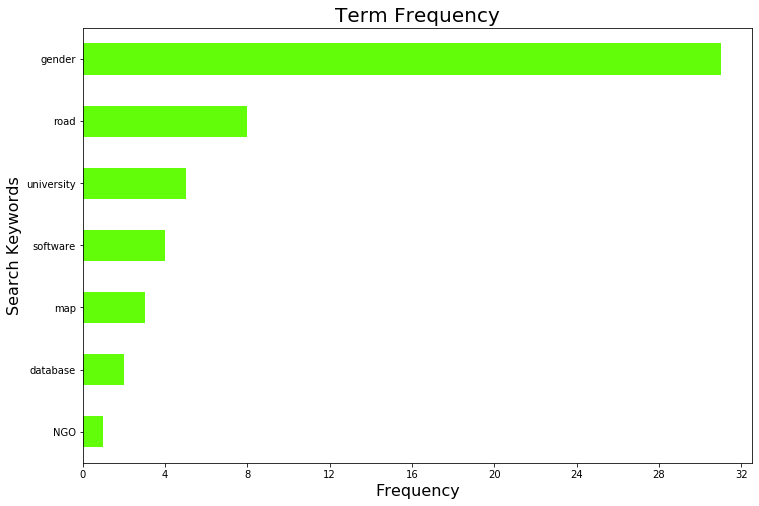

In [14]:
# Transpose the datafrme
df_vis = pd.DataFrame(df_na_dropped.stack().reset_index())
df_vis.columns = ['file', 'keyword', 'frequency']
df_vis = df_vis.sort_values(by = ['frequency'], ascending = True)

# Make bar plot
ax = df_vis.plot.barh(figsize = [12,8], x = 'keyword', y = 'frequency', color = '#62FD08', legend = False)
plt.xlabel('Frequency', fontsize = 16)
plt.ylabel('Search Keywords', fontsize = 16)
plt.title('Term Frequency', fontsize = 20)
ax.xaxis.set_major_locator(MaxNLocator(integer = True))

### Export the result with null values

In [15]:
#df.to_csv(your_pdf_file_name + '.csv')

### Export the result without null values

In [16]:
#df_na_dropped.to_csv(your_pdf_file_name + '_nonnull.csv')